# 집값 예측 경진대회 EDA
- id : 데이터 고유 id
- OverallQual : 전반적 재료와 마감 품질
- YearBuilt : 완공 연도
- YearRemodAdd : 리모델링 연도
- ExterQual : 외관 재료 품질
- BsmtQual : 지하실 높이
- TotalBsmtSF : 지하실 면적 
- 1stFlrSF : 1층 면적 
- GrLivArea : 지상층 생활 면적
- FullBath : 지상층 화장실 개수 
- KitchenQual : 부억 품질 
- GarageYrBlt : 차고 완공 연도
- GarageCars: 차고 자리 개수
- GarageArea: 차고 면적 
- target : 집값(달러 단위)

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./data/train.csv')
df.drop(['id'],axis=1, inplace = True)
df.head()

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


## Null data 및 데이터 타입 분석

In [3]:
print(len(df))
df.info()

1350
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Overall Qual    1350 non-null   int64 
 1   Gr Liv Area     1350 non-null   int64 
 2   Exter Qual      1350 non-null   object
 3   Garage Cars     1350 non-null   int64 
 4   Garage Area     1350 non-null   int64 
 5   Kitchen Qual    1350 non-null   object
 6   Total Bsmt SF   1350 non-null   int64 
 7   1st Flr SF      1350 non-null   int64 
 8   Bsmt Qual       1350 non-null   object
 9   Full Bath       1350 non-null   int64 
 10  Year Built      1350 non-null   int64 
 11  Year Remod/Add  1350 non-null   int64 
 12  Garage Yr Blt   1350 non-null   int64 
 13  target          1350 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 147.8+ KB


분석
- NUll 값 없음
  - 전처리 X
- 카테고리형 데이터 : Exter Qual, KitchenQual, Bsmt Qual
- 수치형 데이터
  - 'Overall Qual', 'Gr Liv Area', 'Garage Cars','Garage Area', 'Total Bsmt SF', '1st Flr SF','Full Bath', 
  - 'Year Built', 'Year Remod/Add' , 'Garage Yr Blt' 

In [4]:
feature_int = ['Overall Qual', 'Gr Liv Area', 'Garage Cars','Garage Area', 'Total Bsmt SF', 
                '1st Flr SF','Full Bath', 'Year Built', 'Year Remod/Add','Garage Yr Blt']
feature_category = ['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']

## 카테고리형 데이터 처리

In [5]:
# ExterQual : 외관 재료 품질
df['Exter Qual'].unique()

array(['Ex', 'Gd', 'TA', 'Fa'], dtype=object)

<AxesSubplot:xlabel='Exter Qual', ylabel='target'>

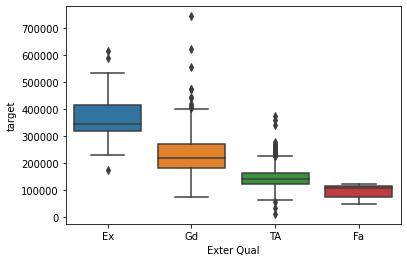

In [6]:
sns.boxplot(x = df['Exter Qual'], y = df['target'])

In [7]:
# KitchenQual : 부억 품질 
df['Kitchen Qual'].unique()

array(['Ex', 'Gd', 'TA', 'Fa'], dtype=object)

<AxesSubplot:xlabel='Kitchen Qual', ylabel='target'>

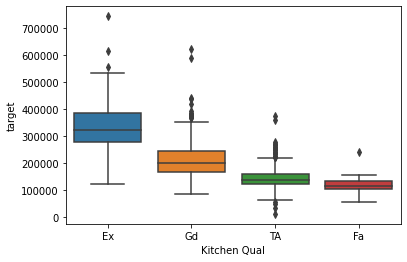

In [8]:
sns.boxplot(x = df['Kitchen Qual'], y = df['target'])

In [9]:
# BsmtQual : 지하실 높이
df['Bsmt Qual'].unique()

array(['Ex', 'TA', 'Gd', 'Fa', 'Po'], dtype=object)

<AxesSubplot:xlabel='Bsmt Qual', ylabel='target'>

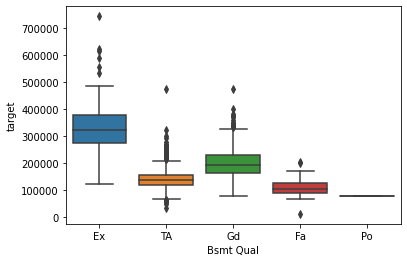

In [10]:
sns.boxplot(x = df['Bsmt Qual'], y = df['target'])

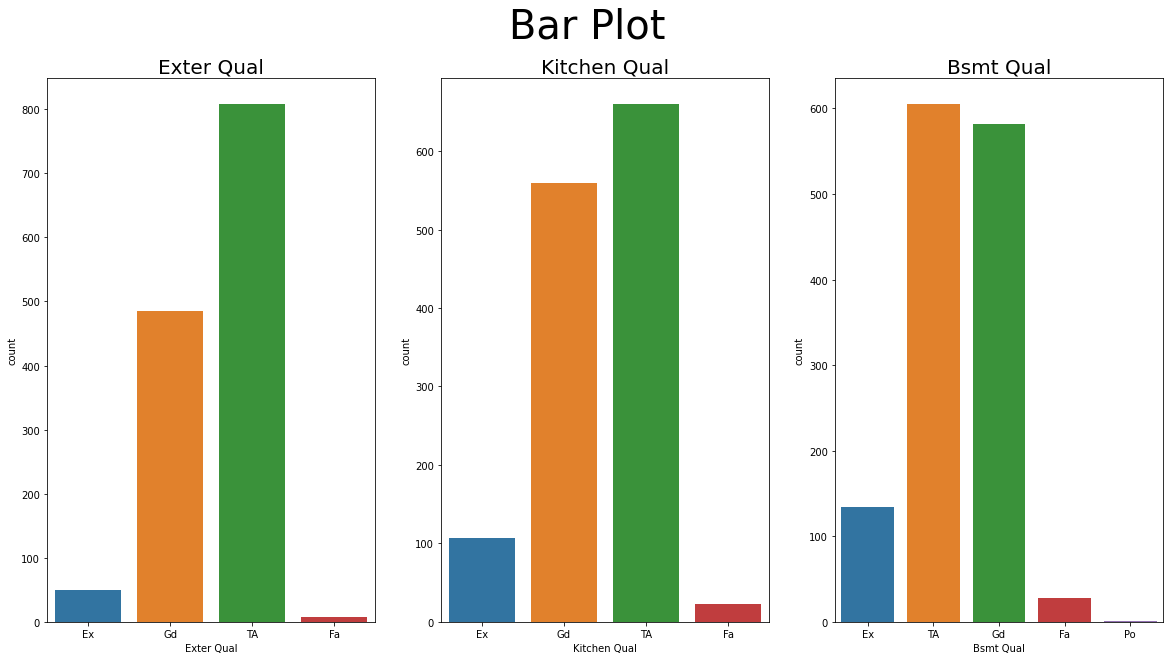

In [11]:
plt.figure(figsize=(20,10))
plt.suptitle("Bar Plot", fontsize=40)

for idx, t in enumerate(feature_category, 1):
    ax = plt.subplot(1, 3, idx)
    plt.title(t, fontsize=20)
    sns.countplot(x = df[t], ax = ax)
plt.show()

분석
- TA, GD에 데이터가 편중되어 있음

## 수치형 데이터

In [12]:
df[['Overall Qual', 'target']].corr().iloc[0,1].round(2)

0.81

C:\Users\user\anaconda3\envs\kivytest\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\envs\kivytest\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\envs\kivytest\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\envs\kivytest\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\envs\kivytest\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fi

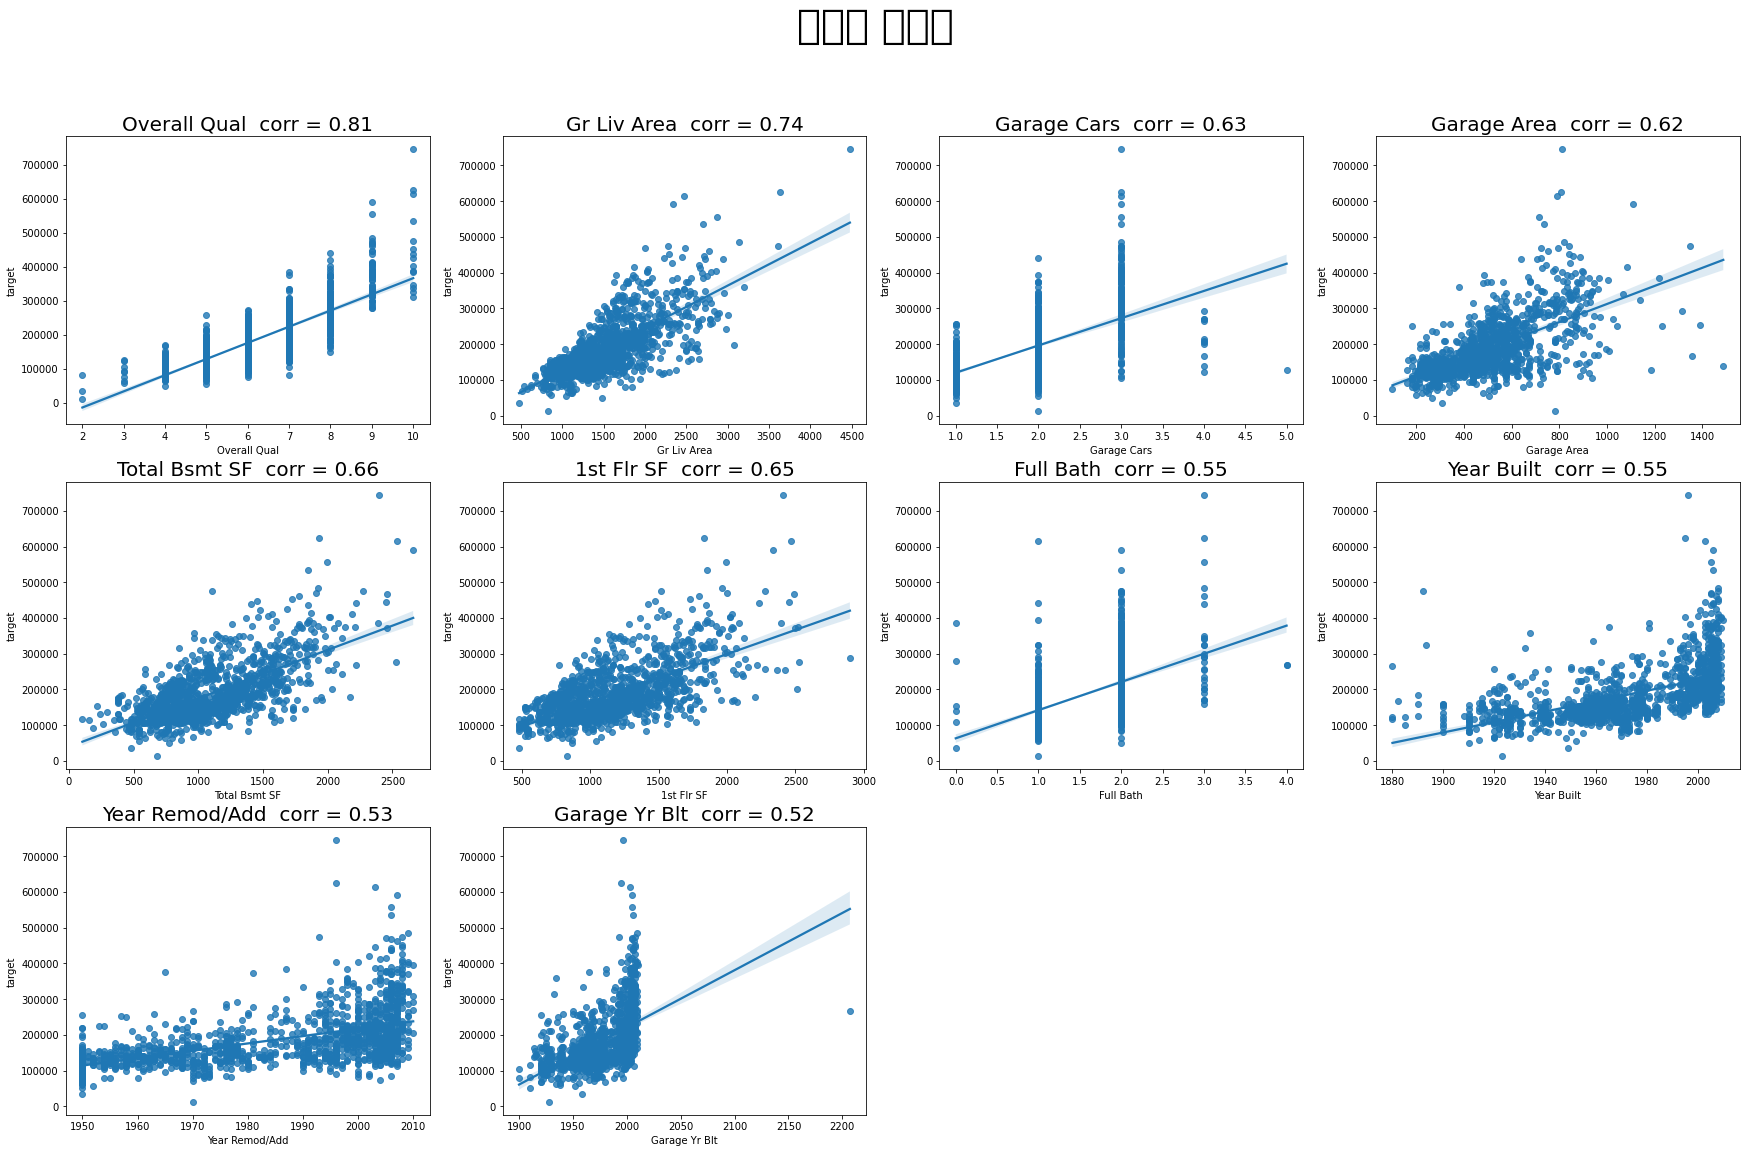

In [13]:
plt.figure(figsize=(30,18))
plt.suptitle("수치형 데이터", fontsize=40)

for idx, t in enumerate(feature_int, 1):
    ax = plt.subplot(3, 4, idx)
    plt.title(t + f"  corr = {df[[t, 'target']].corr().iloc[0,1].round(2)}", fontsize=20)
    sns.regplot(x = df[t], y = df['target'], ax = ax)
plt.show()

In [14]:
df[['Garage Cars', 'Garage Area']].corr()

,Garage Cars,Garage Area
Garage Cars,1.000000,0.840054
Garage Area,0.840054,1.000000


In [15]:
df['Garage Yr Blt'].sort_values(ascending = False)

254    2207
687    2010
511    2009
259    2009
265    2009
       ... 
65     1910
404    1910
873    1910
246    1900
896    1900
Name: Garage Yr Blt, Length: 1350, dtype: int64

분석
- Full bath : target과 무관
- Garage Cars : 특정시점(3대)까지는 비레하나, 이후에는 오히려 집값 감소
- Garage Area 는 Garage Cars와 상관도가 매우 높아(0.84) 둘 중 하나만 사용하는 것이 좋을 것이라고 생각됨
- Year Remod/Add : 1950 값이 지나치게 많음. 데이터 오염이 의심됨
- Garage Yr Blt : 2207년 값이 존재. 데이터 오류

In [16]:
# 중복값 처리
df = df.drop_duplicates()
print(len(df))
df.head()

1349


,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


In [17]:
# Year Remod/Add 1950이 너무 많은 문제
# 리모델링 연도가 불명일 경우 1950년으로 체크했을 가능성이 있음
# 리모델링 연도가 모두 건설 년도 이후이므로 데이터를 그대로 사용
df[df['Year Remod/Add'] < df['Year Built']]

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target


In [18]:
df[df['Garage Yr Blt'] == 2207]

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
254,8,1564,Gd,2,502,Ex,1546,1564,Gd,2,2006,2007,2207,267300


In [19]:
df = df.drop(255) #254번 행을 삭제했습니다.
df.loc[250:260] 

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
250,8,2340,Gd,3,787,Gd,1236,1236,Gd,2,1996,1996,1996,306000
251,4,875,TA,2,728,Gd,385,875,TA,1,1972,2006,1975,117000
252,5,988,TA,1,276,TA,876,988,TA,1,1950,1950,1950,119000
253,5,793,TA,1,240,Fa,793,793,TA,1,1945,1950,1945,113000
254,8,1564,Gd,2,502,Ex,1546,1564,Gd,2,2006,2007,2207,267300
256,7,1958,Gd,2,499,Gd,779,1029,Gd,2,1994,2001,1994,220000
257,5,1211,TA,2,576,TA,864,1211,TA,1,1962,2002,1972,144000
258,7,1802,TA,1,216,TA,793,901,Fa,1,1920,1950,1920,200100
259,8,1836,Gd,2,517,Gd,1836,1836,Gd,2,2008,2009,2009,264500
260,6,1314,Gd,2,440,Gd,1314,1314,Gd,2,2006,2006,2006,176432


In [20]:
df.reset_index(inplace = True, drop = True)
df.loc[250:260]

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
250,8,2340,Gd,3,787,Gd,1236,1236,Gd,2,1996,1996,1996,306000
251,4,875,TA,2,728,Gd,385,875,TA,1,1972,2006,1975,117000
252,5,988,TA,1,276,TA,876,988,TA,1,1950,1950,1950,119000
253,5,793,TA,1,240,Fa,793,793,TA,1,1945,1950,1945,113000
254,8,1564,Gd,2,502,Ex,1546,1564,Gd,2,2006,2007,2207,267300
255,7,1958,Gd,2,499,Gd,779,1029,Gd,2,1994,2001,1994,220000
256,5,1211,TA,2,576,TA,864,1211,TA,1,1962,2002,1972,144000
257,7,1802,TA,1,216,TA,793,901,Fa,1,1920,1950,1920,200100
258,8,1836,Gd,2,517,Gd,1836,1836,Gd,2,2008,2009,2009,264500
259,6,1314,Gd,2,440,Gd,1314,1314,Gd,2,2006,2006,2006,176432


### 카테고리 데이터 

In [21]:
dic_four = {}
for x, y in zip(['Ex', 'Gd', 'TA', 'Fa'], [4,3,2,1]):
    dic_four[x] = y
df['Exter Qual encoded'] = df['Exter Qual'].map(dic_four)
df['Kitchen Qual encoded'] = df['Kitchen Qual'].map(dic_four)

In [22]:
dic_five = {}
for x, y in zip(['Ex', 'TA', 'Gd', 'Fa', 'Po'], [5,3,4,2,1]):
    dic_five[x] = y
df['Bsmt Qual encoded'] = df['Bsmt Qual'].map(dic_five)

In [23]:
df.head()

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target,Exter Qual encoded,Kitchen Qual encoded,Bsmt Qual encoded
0,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250,4,4,5
1,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000,3,3,5
2,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000,2,2,3
3,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000,2,3,3
4,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000,3,3,4


In [24]:
#%pip install pycaret

In [25]:
df.drop(feature_category,axis=1, inplace = True)
df.head()

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target,Exter Qual encoded,Kitchen Qual encoded,Bsmt Qual encoded
0,10,2392,3,968,2392,2392,2,2003,2003,2003,386250,4,4,5
1,7,1352,2,466,1352,1352,2,2006,2007,2006,194000,3,3,5
2,5,900,1,288,864,900,1,1967,1967,1967,123000,2,2,3
3,5,1174,2,576,680,680,1,1900,2006,2000,135000,2,3,3
4,7,1958,3,936,1026,1026,2,2005,2005,2005,250000,3,3,4


In [26]:
df

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target,Exter Qual encoded,Kitchen Qual encoded,Bsmt Qual encoded
0,10,2392,3,968,2392,2392,2,2003,2003,2003,386250,4,4,5
1,7,1352,2,466,1352,1352,2,2006,2007,2006,194000,3,3,5
2,5,900,1,288,864,900,1,1967,1967,1967,123000,2,2,3
3,5,1174,2,576,680,680,1,1900,2006,2000,135000,2,3,3
4,7,1958,3,936,1026,1026,2,2005,2005,2005,250000,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,6,1756,2,422,872,888,2,1996,1997,1996,204000,3,2,5
1344,9,2748,3,850,1850,1850,2,2006,2006,2006,390000,3,4,5
1345,5,1214,1,318,1214,1214,2,1967,1967,1967,143000,2,2,3
1346,5,894,2,440,864,894,1,1974,1974,1974,131000,2,2,4


In [27]:
from pycaret.regression import *
reg = setup(data = df, target = 'target', normalize = True, session_id = 0 )

,Description,Value
0,session_id,0
1,Target,target
2,Original Data,"(1348, 14)"
3,Missing Values,0
4,Numeric Features,7
5,Categorical Features,6
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(943, 38)"


In [28]:
def NMAE(true, pred): # NMAE의 경우 pycaret에서 지원하지 않습니다. 
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score 

In [29]:
# add metric을 사용하면 pycaret에 custom metric을 사용할 수 있습니다!
add_metric('NMAE', 'NMAE', NMAE, greater_is_better = False) 

Name                                                       NMAE
Display Name                                               NMAE
Score Function            <function NMAE at 0x000001E138E97F70>
Scorer               make_scorer(NMAE, greater_is_better=False)
Target                                                     pred
Args                                                         {}
Greater is Better                                         False
Custom                                                     True
Name: NMAE, dtype: object

In [30]:
best = compare_models(sort= 'NMAE',n_select=3) #상위 모델 3개를 선택합니다

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,NMAE,TT (Sec)
gbr,Gradient Boosting Regressor,19039.0287,874479903.1068,29199.6308,0.8684,0.1497,0.1117,0.1006,0.0510
huber,Huber Regressor,19128.6362,811665314.7961,28318.8653,0.8759,0.1509,0.1125,0.1011,0.0200
ridge,Ridge Regression,19332.7425,784242365.9170,27886.4496,0.8791,0.1513,0.1135,0.1021,0.0050
br,Bayesian Ridge,19345.6612,786551361.5867,27929.5253,0.8788,0.1516,0.1138,0.1022,0.0050
llar,Lasso Least Angle Regression,19380.0626,779557229.1433,27781.5572,0.8801,0.1556,0.1120,0.1023,0.0140
lasso,Lasso Regression,19412.0357,781097655.5555,27809.4015,0.8799,0.1559,0.1123,0.1025,0.0120
lr,Linear Regression,19423.7265,781870306.9366,27823.4277,0.8797,0.1552,0.1123,0.1026,0.4790
rf,Random Forest Regressor,19436.8616,922108392.9466,30056.9557,0.8618,0.1532,0.1143,0.1027,0.1190
lightgbm,Light Gradient Boosting Machine,19724.8453,956857142.1938,30455.7676,0.8570,0.1538,0.1139,0.1043,0.0240
par,Passive Aggressive Regressor,20190.1775,942990029.2660,30445.4673,0.8574,0.1554,0.1161,0.1066,0.0300


In [31]:
# voting regressor로 블렌딩합니다.
blend = blend_models(estimator_list= best, fold=5, optimize='NMAE')
pred_holdout = predict_model(blend)

,MAE,MSE,RMSE,R2,RMSLE,MAPE,NMAE
0,19721.6786,766742915.1760,27690.1231,0.8563,0.1515,0.1138,0.1064
1,19103.1394,827571606.8066,28767.5443,0.8856,0.2265,0.1598,0.1034
2,19710.3212,849474975.0501,29145.7540,0.8945,0.1406,0.1027,0.1012
3,18163.6028,880586466.7670,29674.6772,0.8885,0.1175,0.0887,0.0916
4,15851.5545,601892310.1265,24533.4936,0.8722,0.1182,0.0883,0.0861
Mean,18510.0593,785253654.7852,27962.3184,0.8794,0.1509,0.1107,0.0978
SD,1445.5500,98962176.8921,1833.6854,0.0137,0.0400,0.0264,0.0076


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,NMAE
0,Voting Regressor,18458.8825,675243152.2067,25985.4412,0.8604,0.1526,0.1120,0.1029


# Evaluate

In [32]:
test_data = pd.read_csv('./data/test.csv')
test_data.drop(['id'],axis=1, inplace = True)
test_data.head()

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
0,9,1800,Gd,2,702,Ex,1800,1800,Ex,2,2007,2007,2007
1,6,1082,TA,1,240,TA,1082,1082,TA,1,1948,1950,1948
2,6,1573,Gd,2,440,Gd,756,769,Gd,2,2000,2000,2000
3,6,2443,Gd,3,744,Gd,1158,1158,Gd,2,2004,2004,2004
4,5,1040,TA,2,686,TA,1040,1040,TA,1,1968,1968,1991


In [33]:
print(test_data['Exter Qual'].unique())
print(test_data['Kitchen Qual'].unique())
print(test_data['Bsmt Qual'].unique())

['Gd' 'TA' 'Ex' 'Fa']
['Ex' 'TA' 'Gd' 'Fa' 'Po']
['Ex' 'TA' 'Gd' 'Fa' 'Po']


In [34]:
test_data['Kitchen Qual'].value_counts()

TA    666
Gd    566
Ex     94
Fa     23
Po      1
Name: Kitchen Qual, dtype: int64

In [35]:
def change(x):
    if x == 'Po': return 'Fa'
    else: return x
test_data['Kitchen Qual'] = test_data['Kitchen Qual'].apply(change)

In [36]:
test_data['Kitchen Qual'].value_counts()

TA    666
Gd    566
Ex     94
Fa     24
Name: Kitchen Qual, dtype: int64

In [37]:
test_data['Exter Qual encoded'] = test_data['Exter Qual'].map(dic_four)
test_data['Kitchen Qual encoded'] = test_data['Kitchen Qual'].map(dic_four)
test_data['Bsmt Qual encoded'] = test_data['Bsmt Qual'].map(dic_five)
test_data.drop(feature_category,axis=1, inplace = True)
test_data.head()

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,Exter Qual encoded,Kitchen Qual encoded,Bsmt Qual encoded
0,9,1800,2,702,1800,1800,2,2007,2007,2007,3,4,5
1,6,1082,1,240,1082,1082,1,1948,1950,1948,2,2,3
2,6,1573,2,440,756,769,2,2000,2000,2000,3,3,4
3,6,2443,3,744,1158,1158,2,2004,2004,2004,3,3,4
4,5,1040,2,686,1040,1040,1,1968,1968,1991,2,2,3


In [38]:
test_data['Kitchen Qual encoded'].value_counts()

2    666
3    566
4     94
1     24
Name: Kitchen Qual encoded, dtype: int64

In [39]:
final_model = finalize_model(blend)
pred = predict_model(final_model, test_data)

In [44]:
pred

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,Exter Qual encoded,Kitchen Qual encoded,Bsmt Qual encoded,Label
0,9,1800,2,702,1800,1800,2,2007,2007,2007,3,4,5,334647.858571
1,6,1082,1,240,1082,1082,1,1948,1950,1948,2,2,3,128569.389942
2,6,1573,2,440,756,769,2,2000,2000,2000,3,3,4,179968.419917
3,6,2443,3,744,1158,1158,2,2004,2004,2004,3,3,4,272796.597158
4,5,1040,2,686,1040,1040,1,1968,1968,1991,2,2,3,132680.062306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,8,1932,3,774,1932,1932,2,2008,2008,2008,4,4,5,344918.976120
1346,5,912,1,288,912,912,1,1964,1964,1964,2,2,3,118079.169717
1347,4,861,2,288,861,861,1,1920,1950,1920,2,2,2,80072.926143
1348,5,1430,2,624,1430,1430,2,2004,2005,2004,2,3,5,210683.062030


## Sampling

In [43]:
submission = pd.read_csv("./data/sample_submission.csv")
submission.head()

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [47]:
submission['target'] = pred['Label']
submission.head()

,id,target
0,1,334647.858571
1,2,128569.389942
2,3,179968.419917
3,4,272796.597158
4,5,132680.062306


In [48]:
submission.to_csv("housing.csv", index=False)